In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [2]:
X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)


In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2
,random_state=42)   
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Confusion Matrix:
 [[75 14]
 [20 91]]


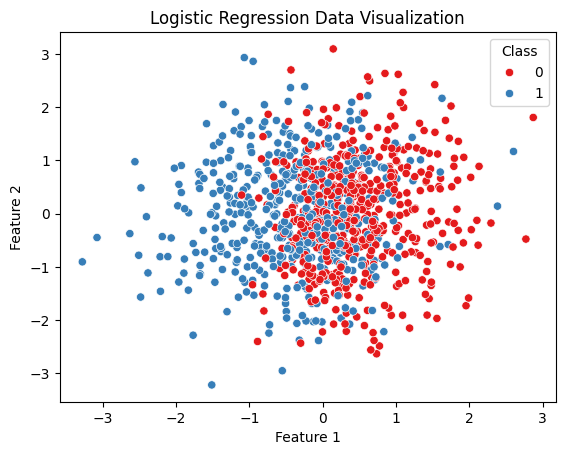

In [5]:
# model visuals
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette='Set1')
plt.title('Logistic Regression Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Class')
plt.show()


In [12]:
# hyperparameters tuning
model=LogisticRegression()
penalty=['l1','l2','elasticnet','none']
c_values=[0.01,0.1,1,10,100]
solver=['liblinear','saga','sag','newton-cg','lbfgs']


In [13]:
params=dict(
    penalty=penalty,
    C=c_values,
    solver=solver
)


In [16]:
#grid search cv
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5)
grid_search.fit(X_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
grid_search.fit(X_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
